In [27]:
import pandas as pd
df = pd.read_csv("PSDP_2024_25_verified.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sr#                 1010 non-null   int64  
 1   Project_Title       1010 non-null   object 
 2   Approval_Status     1010 non-null   object 
 3   Approved_Date       976 non-null    object 
 4   Total_Cost          1010 non-null   float64
 5   Foreign Loan        1010 non-null   float64
 6   Expenditure_2024    1010 non-null   float64
 7   Throwforward_2025   1010 non-null   float64
 8   Rupee_Funding       1010 non-null   float64
 9   Allocation_2024_25  1010 non-null   float64
 10  Type                1010 non-null   object 
 11  Ministry            1010 non-null   object 
 12  Utilization%        1010 non-null   float64
 13  Approval_Year       976 non-null    float64
 14  Approval_Month      976 non-null    float64
dtypes: float64(9), int64(1), object(5)
memory usage: 118.5+

In [28]:
# Show all rows that have ANY NaN values
nan_rows = df[df.isnull().any(axis=1)]
print(f"Total rows with NaN values: {len(nan_rows)}")
nan_rows

Total rows with NaN values: 34


,Sr#,Project_Title,Approval_Status,Approved_Date,Total_Cost,Foreign Loan,Expenditure_2024,Throwforward_2025,Rupee_Funding,Allocation_2024_25,Type,Ministry,Utilization%,Approval_Year,Approval_Month
17,18,One Stop Investor Facilitation Center,Under Process,NaN,2000.00,0.00,0.000,2000.000,0.000,0.000,New,BOARD OF INVESTMENT,0.000000,NaN,NaN
19,20,Sustainable Development Goals Achievement Prog...,CDWP,NaN,0.00,0.00,0.000,0.000,25000.000,25000.000,On-going,CABINET DIVISION,0.000000,NaN,NaN
30,31,1x Dormitory for 200 student at CTTI Islamabad,DDWP,NaN,203.00,0.00,166.158,36.842,36.843,36.843,On-going,COMMUNICATIONS DIVISION,81.851232,NaN,NaN
63,64,Design and Feasibilities Studies,Approved,NaN,2874.49,0.00,2549.250,325.246,500.000,500.000,On-going,COMMUNICATIONS DIVISION,88.685297,NaN,NaN
118,119,China Aided Projects of Pakistan National High...,Grant,NaN,28500.00,25650.00,125.000,28375.000,0.000,1000.000,On-going,COMMUNICATIONS DIVISION,0.438596,NaN,NaN
133,134,Construction of Mashkhel – Panjgoor Road (191....,Under Process,NaN,46000.00,0.00,0.000,46000.000,0.000,0.000,New,COMMUNICATIONS DIVISION,0.000000,NaN,NaN
136,137,Construction of New Road from Esa Khel Interch...,CDWP,NaN,50.00,0.00,0.000,50.000,1.000,1.000,New,COMMUNICATIONS DIVISION,0.000000,NaN,NaN
152,153,Construction of Academic Block of National Uni...,Under Process,NaN,6048.00,0.00,6048.000,0.000,0.000,0.000,New,DEFENCE DIVISION,100.000000,NaN,NaN
181,182,Pakistan Education Fund (M/o Federal Education),ECNEC,NaN,5000.00,0.00,1000.000,4000.000,4000.000,4000.000,On-going,FEDERAL EDUCATION & PROFESSIONAL TRAINING DIVI...,20.000000,NaN,NaN
186,187,Pakistan National Endowment Fund (NEST),Under Process,NaN,10000.00,0.00,0.000,10000.000,0.000,0.000,New,FEDERAL EDUCATION & PROFESSIONAL TRAINING DIVI...,0.000000,NaN,NaN


In [29]:
df["Label"] = (df["Utilization%"] >= 60).astype(int)


In [30]:
df.columns

Index(['Sr#', 'Project_Title', 'Approval_Status', 'Approved_Date',
       'Total_Cost', 'Foreign Loan', 'Expenditure_2024', 'Throwforward_2025',
       'Rupee_Funding', 'Allocation_2024_25', 'Type', 'Ministry',
       'Utilization%', 'Approval_Year', 'Approval_Month', 'Label'],
      dtype='object')

In [31]:
df_encoded = pd.get_dummies(df[["Ministry","Type"]], drop_first=True)
X = pd.concat([df[["Total_Cost","Expenditure_2024","Foreign Loan","Throwforward_2025",
                   "Rupee_Funding","Allocation_2024_25","Approval_Year"]], df_encoded], axis=1)
y = (df["Utilization%"] >= 60).astype(int)


In [32]:
X

,Total_Cost,Expenditure_2024,Foreign Loan,Throwforward_2025,Rupee_Funding,Allocation_2024_25,Approval_Year,Ministry_848 Innovation Lab at Ministry of Under Process 180.700 0.000 0.000 180.700 0.000 0.000 0.000,Ministry_AVIATION DIVISION,Ministry_BOARD OF INVESTMENT,...,Ministry_Section (Karachi Division),Ministry_Strengthening of Ministry of 26.07.2023,Ministry_Sub Division Wazir District Bannu.,Ministry_WATER RESOURCES DIVISION,Type_Ministry of Law and Justice and,Type_Ministry of Railways (2nd,Type_Ministry of Railways (3rd Revised),"Type_Ministry of Railways, Islamabad",Type_New,Type_On-going
0,2629.420,1624.310,0.00,1005.110,50.000,50.000,2018.0,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,6188.760,80.330,5604.00,6108.430,50.000,50.000,2023.0,False,True,False,...,False,False,False,False,False,False,False,False,False,True
2,2522.000,25.173,2462.00,2496.830,5.000,5.000,2020.0,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,51298.180,5696.480,35220.06,45601.700,2550.650,2550.650,2021.0,False,True,False,...,False,False,False,False,False,False,False,False,False,True
4,1737.530,1128.580,0.00,608.947,608.947,608.947,2020.0,False,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,562.996,0.000,0.00,562.996,262.651,262.651,2024.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1006,529.000,0.000,0.00,529.000,150.000,150.000,2024.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1007,647.920,0.000,0.00,647.920,200.000,200.000,2024.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1008,499.230,0.000,0.00,499.230,200.000,200.000,2024.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [34]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9174917491749175
[[224   8]
 [ 17  54]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       232
           1       0.87      0.76      0.81        71

    accuracy                           0.92       303
   macro avg       0.90      0.86      0.88       303
weighted avg       0.92      0.92      0.92       303



In [36]:
import joblib
joblib.dump(X.columns, "model_features.pkl")


['model_features.pkl']

In [37]:
import joblib
import pandas as pd

# Load model and feature structure
model = joblib.load("psdp_efficiency_model.pkl")
model_features = joblib.load("model_features.pkl")


In [38]:
# Example project info (can be any values)
new_data = pd.DataFrame([{
    "Total_Cost": 5000,
    "Expenditure_2024": 3200,
    "Foreign Loan": 0,
    "Throwforward_2025": 1800,
    "Rupee_Funding": 800,
    "Allocation_2024_25": 600,
    "Approval_Year": 2022,
    "Ministry": "FINANCE DIVISION",
    "Type": "On-going"
}])


In [39]:
# One-hot encode new data using same logic
encoded_new = pd.get_dummies(new_data, columns=["Ministry", "Type"], drop_first=True)

# Add missing columns (make it match training)
for col in model_features:
    if col not in encoded_new.columns:
        encoded_new[col] = 0

# Reorder columns
encoded_new = encoded_new[model_features]


In [40]:
prediction = model.predict(encoded_new)
prob = model.predict_proba(encoded_new)

print("Prediction:", prediction[0])
print("Confidence:", prob)


Prediction: 0
Confidence: [[0.73 0.27]]


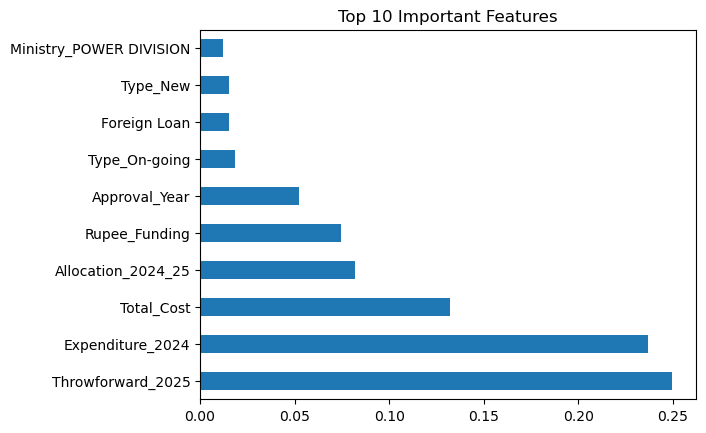

In [17]:
import matplotlib.pyplot as plt
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp.head(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()
